In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.utils import check_random_state
import statsmodels.api as sm
import statsmodels.formula.api as smf
from helper import *

sns.set(style="white", font_scale=2.0)
filename = '2001.csv'

In [2]:
usecols = (13, 14, 16, 18)
columns = ['AirTime', 'ArrDelay', 'Origin', 'Distance']

all_data = pd.read_csv(filename, header=0, na_values=['NA'], usecols=usecols, names=columns)
set_data(all_data)

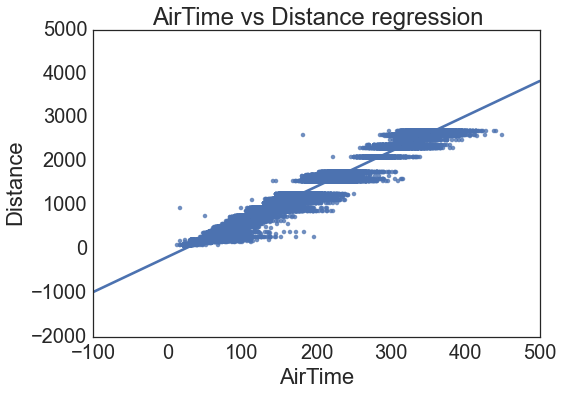

In [3]:
change_origin("BOS")
plot_seaborn_reg('AirTime','Distance')

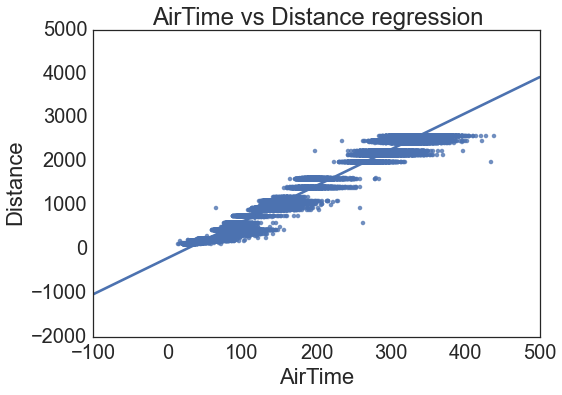

In [4]:
change_origin("JFK")
plot_seaborn_reg('AirTime','Distance')

In [5]:
change_origin("LAX")

X_train, X_test, y_train, y_test = get_train_test(
    train_columns=['AirTime', 'ArrDelay'],
    test_columns=['Distance'],
    test_size=0.2,
    random_state=check_random_state(0)
)

In [6]:
X_pred, y_pred = get_statsmodels_reg(X_train,X_test,y_train)

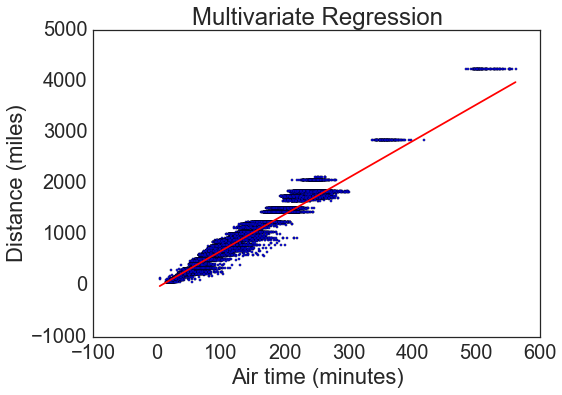

In [7]:
plot_statsmodels_reg(X_test, X_pred, y_test, y_pred)

In [11]:
usecols = (5, 15, 16)
columns = ['CRSDepTime', 'DepDelay', 'Origin']

new_data = pd.read_csv(filename, header=0, na_values=['NA'], usecols=usecols, names=columns)
set_data(new_data)
change_origin("ORD")
set_hourly()

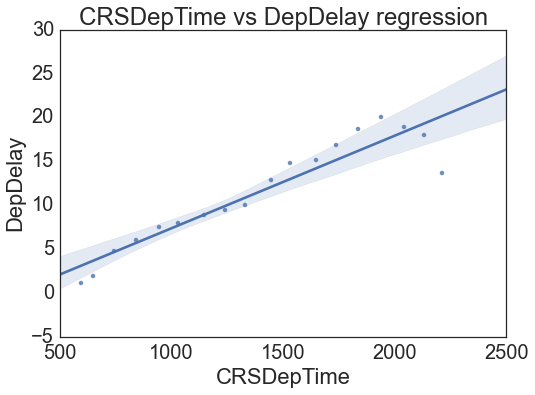

In [12]:
plot_seaborn_reg('CRSDepTime','DepDelay')

In [13]:
degrees = list()
for i in range(1, 15):
    degrees.append(find_mse(i))

best_degree = np.argmin(degrees) + 1 # because degree = 1 corresponds to arg = 0
print('The best model is a polynomial of degree {}.'.format(best_degree))

The best model is a polynomial of degree 11.


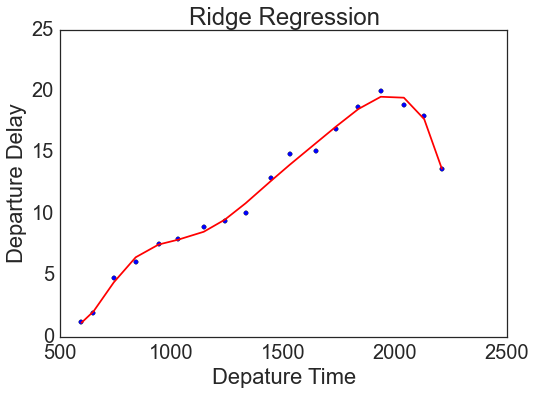

In [14]:
plot_reg_ploy(best_degree)

In [17]:
usecols = (3, 8, 15, 17)
columns = ['DayOfWeek', 'UniqueCarrier', 'DepDelay', 'Origin']

final_data = pd.read_csv(filename, header=0, na_values=['NA'], usecols=usecols, names=columns).dropna()

set_data(final_data)
change_origin("ORD")

In [18]:
convert_to_binary('DepDelay', 5)
add_dummy(add_columns=['DayOfWeek', 'UniqueCarrier'], keep_columns=['DepDelay_binary'])
add_intercept()

train_columns = [
        'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
        'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
        'UniqueCarrier_AS', 'UniqueCarrier_CO', 'UniqueCarrier_DL',
        'UniqueCarrier_HP', 'UniqueCarrier_MQ', 'UniqueCarrier_NW',
        'UniqueCarrier_TW', 'UniqueCarrier_UA', 'UniqueCarrier_US',
        'Intercept'
        ]

model, result = fit_logitistic(train_columns=train_columns, test_column='DepDelay_binary')

Optimization terminated successfully.
         Current function value: 0.589094
         Iterations 5


In [19]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:        DepDelay_binary   No. Observations:               321227
Model:                          Logit   Df Residuals:                   321211
Method:                           MLE   Df Model:                           15
Date:                Sat, 26 Mar 2016   Pseudo R-squ.:                0.005735
Time:                        21:39:51   Log-Likelihood:            -1.8923e+05
converged:                       True   LL-Null:                   -1.9032e+05
                                        LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
DayOfWeek_2         -0.1574      0.015    -10.479      0.000        -0.187    -0.128
DayOfWeek_3          0.0164      0.015      1.113      0.266        -0.012     0.045
DayOfWeek_4          0.2148 

In [22]:
local = pd.read_csv(filename, header=0, na_values=['NA'], usecols=usecols, names=columns).dropna()

In [23]:
print(local.groupby('DayOfWeek').mean().sort_values(by='DepDelay', ascending=False))

            DepDelay
DayOfWeek           
5          11.008359
4           9.207526
7           8.827786
6           7.774358
1           7.223767
3           6.931689
2           6.083388


In [ ]:
print(local.groupby('UniqueCarrier').mean().sort_values(by='DepDelay', ascending=False))